# Segmentation testing

This script tests the segmentation functions.

In [ ]:
from bioio import BioImage
from matplotlib import pyplot as plt
import numpy as np
import skimage
from scipy import stats, ndimage, signal
import math
import csv
import random
import os
import segmentation # Contains the segmentation scripts
import importlib

In [116]:
# Path to image
image_file = ("..\\data\\Day 1 adult animals\\D1A_rep 12.nd2")

# Create a BioImage reader
reader = BioImage(image_file)

# Get number of z-planes
size_z = reader.shape[2]

image = reader.get_image_data("YXC", Z=4)



In [ ]:
image_filtered = skimage.filters.gaussian(image[:, :, 1])

image_filtered = skimage.exposure.equalize_adapthist(image_filtered)

bg = skimage.restoration.rolling_ball(image_filtered)

image_bgsub = image_filtered - bg

th = skimage.filters.threshold_li(image_bgsub)

mask = image_bgsub > th
mask = skimage.morphology.binary_opening(mask, skimage.morphology.disk(5))

plt.imshow(mask)


In [ ]:
image_filtered = skimage.filters.gaussian(image[:, :, 1])
image_filtered = skimage.exposure.equalize_adapthist(image_filtered)
bg = skimage.restoration.rolling_ball(image_filtered, radius=100)
image_bgsub = image_filtered - bg
plt.imshow(image_bgsub)

In [ ]:
image_filtered = skimage.filters.gaussian(image[:, :, 1], 2)
image_filtered = skimage.exposure.adjust_sigmoid(image_filtered, cutoff=0.01, gain=10)
plt.imshow(image_filtered)

fix, ax = skimage.filters.try_all_threshold(image_filtered)
plt.show()

In [ ]:
image_filtered = skimage.filters.gaussian(image[:, :, 1], 2)
image_filtered = skimage.exposure.adjust_log(image_filtered, gain=50)
plt.imshow(image_filtered)


In [ ]:
image_filtered_rgb = np.zeros((image_filtered.shape[0], image_filtered.shape[1], 3), dtype=np.float32)

for i in range(3):
    image_filtered_rgb[:, :, i] = image_filtered

mask = segmentation.segment_tail(image_filtered_rgb)

outline = skimage.segmentation.find_boundaries(mask)

fig, ax = plt.subplots()
ax.imshow(skimage.exposure.equalize_adapthist(image[:, :, 1].squeeze()), cmap='gray')
ax.imshow(outline,cmap='gray', alpha=0.5)
plt.show()

In [ ]:
# Mitochondria
mask_mito = segmentation.segment_mitochondria(image)

outline = skimage.segmentation.find_boundaries(mask_mito)

fig, ax = plt.subplots()
ax.imshow(skimage.exposure.equalize_adapthist(image[:, :, 0].squeeze()), cmap='gray')
ax.imshow(outline,cmap='gray', alpha=0.5)
plt.show()


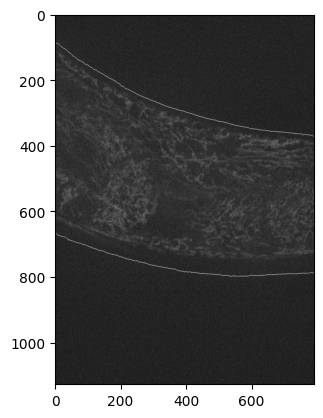

In [117]:
# Segment the tail
importlib.reload(segmentation)

mask = segmentation.segment_tail(image)

outline = skimage.segmentation.find_boundaries(mask)

fig, ax = plt.subplots()
ax.imshow(skimage.exposure.equalize_adapthist(image[:, :, 0].squeeze()), cmap='gray')
ax.imshow(outline,cmap='gray', alpha=0.5)
plt.show()